In [30]:
import cv2
import matplotlib.pyplot as plt

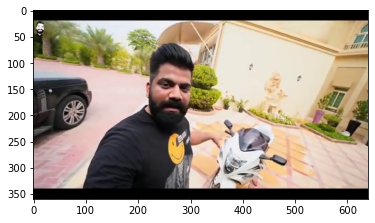

In [31]:
img = cv2.imread("C:/Users/snjts/Object detection dataset/Annot1 (29).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [32]:
classes = []
classesfile = "coco - Copy.names"
with open(classesfile, "rt") as f:
    classes = f.read().rstrip("\n").split("\n")

In [33]:
classes

['person', 'person', 'car', 'car']

In [34]:
confidPath = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [35]:
weightsPath = "frozen_inference_graph.pb"

In [36]:
net = cv2.dnn_DetectionModel(weightsPath, confidPath)
net.setInputSize(180,180)
net.setInputScale(1.0/ 127.5) #(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

<dnn_Model 00000180A1265C30>

In [37]:
 classID, confs, bbox = net.detect(img, confThreshold=0.6)

In [38]:
print(classID, bbox)

[1 3] [[ 99  64 265 291]
 [  0 116 163 133]]


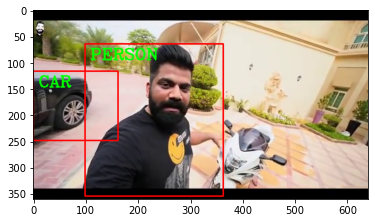

In [39]:
for classId, confidence, box in zip(classID.flatten(), confs.flatten(), bbox):
    cv2.rectangle(img, box, color= (255,0,0), thickness = 2)
    cv2.putText(img, classes[classId-1].upper(),(box[0]+10, box[1]+30),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
plt.imshow(img)